In [52]:
import os
import s3fs
import pandas as pd

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})
BUCKET = "atoubert-ensae"
FILE_KEY_S3 = "X_train_Hi5.csv"
FILE_PATH_S3 = BUCKET + "/Hackathon Hiparis/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    x_train = pd.read_csv(file_in, sep=",")

/tmp/ipykernel_44341/3036990934.py:13: DtypeWarning: Columns (108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  x_train = pd.read_csv(file_in, sep=",")


In [29]:
x_train.tail(50)

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
2830266,3294035,88,Wed Jan 24 19:38:01 CET 2024,45.00,Vosges,88015,CALCAIRES DU DOGGER DU PLATEAU DE HAYE À HATT...,['139AP99'],389.00,03031X0044/F,...,NaN,NaN,NaN,NaN,12.1,200.0,22150,51.5,0,High
2830267,3294036,88,Fri Jun 28 07:31:38 CEST 2024,144.00,Vosges,88488,GRÈS DU TRIAS INFÉRIEUR CAPTIF À VALFROICOURT,"['143AK01', '143AK03', '143AK05']",303.03,03384X0005/F,...,NaN,NaN,NaN,NaN,27.8,230.0,22180,22.2,16.7,High
2830268,3294037,88,Fri Jun 28 07:31:38 CEST 2024,64.00,Vosges,88127,Calcaires du Muschelkalk à Deinvillers,['143AE05'],275.00,03051X0055/F,...,NaN,NaN,NaN,NaN,0,56.0,N/A - résultat non disponible,0,0,Average
2830269,3294038,88,Fri Jun 28 07:31:38 CEST 2024,60.00,Vosges,88098,Grès vosgien en partie libre à Chaumoussey,['143AK03'],395.00,03393X0096/F,...,NaN,NaN,NaN,NaN,6,903.0,25130,31,9.5,Low
2830270,3294039,88,Fri Jun 28 07:31:38 CEST 2024,11.12,Vosges,88216,Fluvioglaciaire sur Muschelkalk gréseux à GRAN...,['040AC45'],396.00,03057X0018/F,...,NaN,NaN,NaN,NaN,2.4,731.0,21640,8.5,47.6,Very Low
2830271,3294040,88,Fri Jun 28 07:31:38 CEST 2024,51.00,Vosges,88381,GRÈS DU TRIAS INFÉRIEUR AFFLEURANT À RELANGES,['143AK09'],399.04,03387X0040/S,...,NaN,NaN,NaN,NaN,47.1,193.0,22240,11.8,17.6,Very Low
2830272,3294041,88,Fri Jun 28 07:31:38 CEST 2024,102.15,Vosges,88199,GRÈS DU TRIAS INFÉRIEUR SOUS COUVERTURE À GIGN...,['143AK09'],372.30,03386X0031/S,...,NaN,NaN,NaN,NaN,0,77.0,N/A - résultat non disponible,0,0,Low
2830273,3294042,88,Thu Jan 25 04:47:11 CET 2024,200.00,Vosges,88140,GRÈS VOSGIEN CAPTIF NON MINÉRALISÉ À DOMBROT-L...,"['143AK03', '143AK05']",386.30,BSS003GPNI/X,...,NaN,NaN,NaN,NaN,8.7,361.0,23800,0,60.9,High
2830274,3294043,88,Wed Jan 24 22:12:08 CET 2024,126.00,Vosges,88271,GRÈS DU TRIAS INFÉRIEUR SOUS COUVERTURE À LIGN...,"['143AK03', '143AK05']",395.00,BSS003YBQW/X,...,NaN,NaN,NaN,NaN,16.9,302.0,24720,0,0,Low
2830275,3294044,88,Thu Jan 25 04:13:42 CET 2024,54.00,Vosges,88231,CALCAIRES DU MUSCHELKALK À HAREVILLE,"['143AE05', '143AI01']",362.78,03384X0037/PZ,...,NaN,NaN,NaN,NaN,7.7,475.0,24250,0,43.6,Low


In [4]:
x_train.describe

<bound method NDFrame.describe of          row_index piezo_station_department_code  \
0                0                            01   
1                1                            01   
2                2                            01   
3                3                            01   
4                4                            01   
...            ...                           ...   
2830311    3294080                            95   
2830312    3294081                            95   
2830313    3294082                            95   
2830314    3294083                            95   
2830315    3294084                            95   

             piezo_station_update_date  piezo_station_investigation_depth  \
0        Sun Jul 14 13:00:02 CEST 2024                              20.00   
1        Sun Jul 14 13:00:02 CEST 2024                              35.60   
2        Sun Jul 14 13:00:02 CEST 2024                              35.22   
3        Sun Jul 14 13:00:02 CEST

In [5]:
train_sample = x_train.sample(n=10_000, random_state=42)

In [6]:
train_sample.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
2613083,3067028,33,Fri Jun 28 07:31:38 CEST 2024,123.0,Gironde,33517,LE PORT (SOUSSANS-33),['334AG04'],3.59,07795X0106/PZEM9,...,NaN,NaN,NaN,NaN,19,1692.0,23100,6.3,18.5,Average
1268326,1334103,49,Fri Jan 12 10:28:05 CET 2024,93.5,Maine-et-Loire,49194,FONTAINE-MILONJurassique,['139AP14'],40.00,04552X0111/PZ2,...,-0.281423,47.471283,49194.0,18620902.0,8.8,5815.0,23560,8.8,12.5,Average
234393,246594,27,Mon Sep 23 19:38:51 CEST 2024,12.0,Eure,27391,PUITS DE L'ANCIENNE GARE (MARCILLY-SUR-EURE),['121AS01'],75.00,01807X0051/S1,...,1.365070,48.713810,28404.0,29117529.0,1.3,1588.0,25340,16.6,15.9,High
1670802,1756732,44,Fri Jun 28 07:31:38 CEST 2024,8.0,Loire-Atlantique,44025,Forage de LA RIVIERE,['104AB01'],5.00,04503X0068/PZ2,...,-1.881925,47.275110,44045.0,8572341.0,1,4005.0,23620,18.6,19.8,Average
2804886,3267483,77,Thu Sep 19 14:26:45 CEST 2024,15.0,Seine-et-Marne,77341,PIÉZOMÈTRE DE NOYEN-SUR-SEINE (NOYEN-SUR-SEINE...,['928AC01'],57.50,02606X0112/G5,...,NaN,NaN,NaN,NaN,0,384.0,24270,0,8.3,Very Low


In [7]:
train_sample.tail(10)

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
1356563,1426779,40,Fri Jun 28 07:31:38 CEST 2024,72.00,Landes,40158,F1 Lapeyrade,['320AA01'],144.00,09264X0038/F,...,-0.098517,43.875774,32127.0,1.985332e+07,5.2,278.0,18590,65.2,0.9,Very High
112182,117997,24,Fri Jun 28 07:31:38 CEST 2024,10.00,Dordogne,24080,PECESTIER (CAPDROT - 24),['346AA03'],232.00,08317X0024/PUITS2,...,0.878274,44.665158,24195.0,1.156138e+07,2.5,461.0,21100,1,0,Very High
1998954,2100777,54,Fri Jun 28 07:31:38 CEST 2024,119.30,Meurthe-et-Moselle,54371,S15 - Pz M2 Paradis aval - Calcaires du Dogger...,['139AP99'],215.82,01377X0212/M02,...,5.942921,49.199276,54371.0,2.021503e+07,4.3,1077.0,24430,9.7,18.3,Low
167004,175686,21,Fri Jun 28 07:31:38 CEST 2024,50.00,Côte-d'Or,21584,forage BRGM (Saulieu-21),['208AA01'],567.00,04973X0005/PZ1,...,4.228165,47.232075,21560.0,1.936866e+06,1.1,2324.0,20760,23.1,5.6,Very High
2737977,3197519,17,Fri Jun 28 07:31:38 CEST 2024,40.00,Charente-Maritime,17385,L'AUBIER F,['348AE23'],7.10,06576X0030/F,...,NaN,NaN,NaN,NaN,9.4,6627.0,23040,7.5,5.9,Average
28346,29791,36,Fri Jun 28 07:31:38 CEST 2024,138.86,Indre,36110,VAVRE - AEP VAVRE N 1 - PARCELLE 1369 - STAT...,"['141AC01', '141AG05', '143AB99', '143AD99']",184.00,05933X0006/FAEP3,...,1.581543,46.502656,36012.0,2.787306e+08,25,259.0,20790,31.2,0,Average
1678943,1765242,67,Fri Jun 28 07:31:38 CEST 2024,9.00,Bas-Rhin,67482,PIEZOMETRE,NaN,140.43,BSS004EPHV/X,...,7.782502,48.532152,67482.0,8.268934e+07,0.1,291313.0,20260,4.6,2.1,Low
1784633,1876137,38,Mon Oct 04 22:03:42 CEST 2021,6.00,Isère,38298,PUITS - LES OVES SUD (LE PEAGE DE ROUSSILLON -...,['712AA01'],137.80,BSS003ZFSK/X,...,4.753204,45.403553,38425.0,3.240429e+09,0,6508.0,18930,5.1,10.5,Average
813048,855057,72,Fri Jun 28 07:31:38 CEST 2024,101.00,Sarthe,72182,BOIS DE FAY,['123AC05'],85.00,03936X0056/PZ,...,0.178346,47.640774,72176.0,2.211338e+07,4.1,1546.0,21750,20.7,2.8,High
1625530,1709203,50,Tue Sep 24 13:16:39 CEST 2024,12.39,Manche,50271,PUITS DE LINGEARD (LINGEARD) - 50,['171AA03'],217.00,02101X0044/P,...,-1.032545,48.941748,50592.0,7.277293e+06,0,87.0,N/A - résultat non disponible,0,0,Low


In [8]:
nan_columns = train_sample.columns[train_sample.isna().all()]
print("Colonnes contenant uniquement des NaN :", nan_columns.tolist())

Colonnes contenant uniquement des NaN : ['meteo_radiation_IR']


In [9]:
train_sample = train_sample.loc[:, train_sample.isna().sum() <= 8000]

In [10]:
train_sample.describe(include='all')

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
count,1.000000e+04,10000,10000,9373.000000,10000,10000,9186,9473,10000.000000,10000,...,7970.000000,7970.000000,7970.000000,8.647000e+03,9895,9895.000000,9895,9895,9895,10000
unique,NaN,94,462,NaN,94,2123,2325,836,NaN,2577,...,NaN,NaN,NaN,NaN,357,NaN,890,489,397,5
top,NaN,33,Fri Jun 28 07:31:38 CEST 2024,NaN,Gironde,13097,Château d'eau,['121BB01'],NaN,00335X0005/S1,...,NaN,NaN,NaN,NaN,0,NaN,N/A - résultat non disponible,0,0,Average
freq,NaN,577,7195,NaN,577,49,20,214,NaN,12,...,NaN,NaN,NaN,NaN,1534,NaN,195,2403,1249,2289
mean,1.565938e+06,NaN,NaN,87.663128,NaN,NaN,NaN,NaN,148.111609,NaN,...,1.984042,46.485167,45547.889460,1.802884e+08,NaN,6763.456695,NaN,NaN,NaN,NaN
std,9.606346e+05,NaN,NaN,255.224380,NaN,NaN,NaN,NaN,197.356372,NaN,...,2.633540,2.112996,24646.242807,1.175160e+09,NaN,31552.880175,NaN,NaN,NaN,NaN
min,8.300000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-999.000000,NaN,...,-4.731051,42.407792,1027.000000,0.000000e+00,NaN,6.000000,NaN,NaN,NaN,NaN
25%,7.495102e+05,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,41.000000,NaN,...,-0.267168,44.647492,26084.000000,7.600472e+06,NaN,480.500000,NaN,NaN,NaN,NaN
50%,1.495360e+06,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,107.000000,NaN,...,1.603242,46.533570,41104.000000,1.696644e+07,NaN,1234.000000,NaN,NaN,NaN,NaN
75%,2.243262e+06,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,187.000000,NaN,...,3.672857,48.272178,67482.000000,3.989934e+07,NaN,3773.000000,NaN,NaN,NaN,NaN


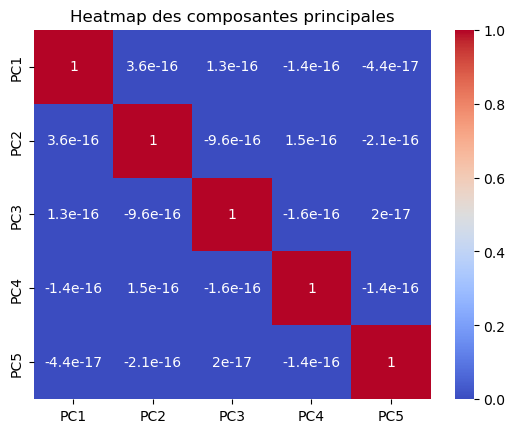

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Étape 1 : Préparation des données
# Filtrer les colonnes numériques
train_sample_numeric = train_sample.select_dtypes(include=['number'])

# Remplir les valeurs manquantes
train_sample_numeric = train_sample_numeric.fillna(train_sample_numeric.mean())

# Standardiser les données
scaler = StandardScaler()
train_sample_scaled = scaler.fit_transform(train_sample_numeric)

# Étape 2 : Effectuer la PCA
pca = PCA(n_components=5)  # Choisissez le nombre de composantes principales
train_sample_pca = pca.fit_transform(train_sample_scaled)

# Transformer en DataFrame pour une visualisation facile
train_sample_pca_df = pd.DataFrame(
    train_sample_pca,
    columns=[f'PC{i+1}' for i in range(train_sample_pca.shape[1])]
)

# Étape 3 : Tracer une heatmap des composantes principales
sns.heatmap(train_sample_pca_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap des composantes principales")
plt.show()

In [12]:
train_sample.head()


,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
2613083,3067028,33,Fri Jun 28 07:31:38 CEST 2024,123.0,Gironde,33517,LE PORT (SOUSSANS-33),['334AG04'],3.59,07795X0106/PZEM9,...,NaN,NaN,NaN,NaN,19,1692.0,23100,6.3,18.5,Average
1268326,1334103,49,Fri Jan 12 10:28:05 CET 2024,93.5,Maine-et-Loire,49194,FONTAINE-MILONJurassique,['139AP14'],40.00,04552X0111/PZ2,...,-0.281423,47.471283,49194.0,18620902.0,8.8,5815.0,23560,8.8,12.5,Average
234393,246594,27,Mon Sep 23 19:38:51 CEST 2024,12.0,Eure,27391,PUITS DE L'ANCIENNE GARE (MARCILLY-SUR-EURE),['121AS01'],75.00,01807X0051/S1,...,1.365070,48.713810,28404.0,29117529.0,1.3,1588.0,25340,16.6,15.9,High
1670802,1756732,44,Fri Jun 28 07:31:38 CEST 2024,8.0,Loire-Atlantique,44025,Forage de LA RIVIERE,['104AB01'],5.00,04503X0068/PZ2,...,-1.881925,47.275110,44045.0,8572341.0,1,4005.0,23620,18.6,19.8,Average
2804886,3267483,77,Thu Sep 19 14:26:45 CEST 2024,15.0,Seine-et-Marne,77341,PIÉZOMÈTRE DE NOYEN-SUR-SEINE (NOYEN-SUR-SEINE...,['928AC01'],57.50,02606X0112/G5,...,NaN,NaN,NaN,NaN,0,384.0,24270,0,8.3,Very Low


In [39]:
x_train.iloc[1268326, :]

row_index                                   1334103
piezo_station_department_code                    49
piezo_station_update_date                       NaT
piezo_station_investigation_depth              93.5
piezo_station_department_name        Maine-et-Loire
                                          ...      
insee_%_ind                                     8.8
insee_%_const                                  12.5
piezo_groundwater_level_category            Average
month                                           NaN
season                                         None
Name: 1268326, Length: 138, dtype: object

In [13]:
categorical_data = train_sample.select_dtypes(include=['category', 'object'])
categorical_data.head()

,piezo_station_department_code,piezo_station_update_date,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_bss_code,piezo_station_commune_name,piezo_station_bss_id,piezo_bss_code,...,prelev_usage_label_1,prelev_volume_obtention_mode_label_1,prelev_structure_code_2,prelev_usage_label_2,prelev_volume_obtention_mode_label_2,insee_%_agri,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
2613083,33,Fri Jun 28 07:31:38 CEST 2024,Gironde,33517,LE PORT (SOUSSANS-33),['334AG04'],07795X0106/PZEM9,Soussans,BSS001WWRT,07795X0106/PZEM9,...,NaN,NaN,NaN,NaN,NaN,19,23100,6.3,18.5,Average
1268326,49,Fri Jan 12 10:28:05 CET 2024,Maine-et-Loire,49194,FONTAINE-MILONJurassique,['139AP14'],04552X0111/PZ2,Mazé-Milon,BSS001FDDV,04552X0111/PZ2,...,EAU POTABLE,Volume mesuré,OPR0000082725,EAU POTABLE,Volume mesuré,8.8,23560,8.8,12.5,Average
234393,27,Mon Sep 23 19:38:51 CEST 2024,Eure,27391,PUITS DE L'ANCIENNE GARE (MARCILLY-SUR-EURE),['121AS01'],01807X0051/S1,Marcilly-sur-Eure,BSS000MTCS,01807X0051/S1,...,EAU POTABLE,Mesure directe,OPR0000033030,EAU POTABLE,Mesure directe,1.3,25340,16.6,15.9,High
1670802,44,Fri Jun 28 07:31:38 CEST 2024,Loire-Atlantique,44025,Forage de LA RIVIERE,['104AB01'],04503X0068/PZ2,Campbon,BSS001ETCE,04503X0068/PZ2,...,EAU POTABLE,Volume mesuré,OPR0000064981,ENERGIE,Volume forfaitaire,1,23620,18.6,19.8,Average
2804886,77,Thu Sep 19 14:26:45 CEST 2024,Seine-et-Marne,77341,PIÉZOMÈTRE DE NOYEN-SUR-SEINE (NOYEN-SUR-SEINE...,['928AC01'],02606X0112/G5,Noyen-sur-Seine,BSS000UFTP,02606X0112/G5,...,NaN,NaN,NaN,NaN,NaN,0,24270,0,8.3,Very Low


In [14]:
categorical_data.columns

Index(['piezo_station_department_code', 'piezo_station_update_date',
       'piezo_station_department_name', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_bss_code', 'piezo_station_commune_name',
       'piezo_station_bss_id', 'piezo_bss_code', 'piezo_measurement_date',
       'piezo_obtention_mode', 'piezo_status', 'piezo_qualification',
       'piezo_continuity_name', 'piezo_producer_name',
       'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_name',
       'meteo_date', 'hydro_station_code', 'hydro_observation_date_elab',
       'hydro_status_label', 'hydro_method_label', 'hydro_qualification_label',
       'hydro_hydro_quantity_elab', 'prelev_structure_code_0',
       'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0',
       'prelev_structure_code_1', 'prelev_usage_label_1',
       'prelev_volume_obtention_mode_label_1', 'prelev_structure_code_2',
       'prelev_usage_label_2',

In [15]:
train_sample['piezo_groundwater_level_category'].nunique()

5

In [16]:
unique_counts = {col: train_sample[col].nunique() for col in categorical_data}

# Étape 3 : Trouver la colonne avec le plus grand nombre de classes
max_classes_col = max(unique_counts, key=unique_counts.get)
max_classes_value = unique_counts[max_classes_col]

In [17]:
max_classes_col

'piezo_station_bss_code'

In [18]:
import copy as cp
for proportion_nan_prct in [19]:
    new_df = cp.deepcopy(x_train)
    for col in new_df.columns:
        if new_df[col].isnull().sum() * 100 / len(x_train) > proportion_nan_prct:
            new_df.drop(col, axis=1, inplace=True)

new_df.head()


,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,hydro_latitude,hydro_hydro_quantity_elab,distance_piezo_hydro,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,45.874843,QmJ,7.093852,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,46.047082,QmM,2.624373,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,45.906423,QmJ,1.542071,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,46.137641,QmM,7.163470,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,46.143007,QmJ,1.528669,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low


In [19]:
df=new_df
categorical_data = df.select_dtypes(include=["object", "category"])

In [20]:
categorical_data.head()


,piezo_station_department_code,piezo_station_update_date,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_bss_code,piezo_station_commune_name,piezo_station_bss_id,piezo_bss_code,...,hydro_observation_date_elab,hydro_status_label,hydro_method_label,hydro_qualification_label,hydro_hydro_quantity_elab,insee_%_agri,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,01,Sun Jul 14 13:00:02 CEST 2024,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],07004X0046/D6-20,Ceyzérieu,BSS001TTQQ,07004X0046/D6-20,...,2020-01-01,Donnée validée,Interpolation,Bonne,QmJ,11.8,25250,2.9,16.2,High
1,01,Sun Jul 14 13:00:02 CEST 2024,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],06754X0077/F1,Saint-Jean-le-Vieux,BSS001SCTM,06754X0077/F1,...,2020-01-01,Donnée validée,Interpolation,Bonne,QmM,0.6,24660,44.5,11,Very High
2,01,Sun Jul 14 13:00:02 CEST 2024,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],06993X0226/MEXI_2,Meximieux,BSS001TRPH,06993X0226/MEXI_2,...,2020-01-01,Donnée validée,Interpolation,Bonne,QmJ,0,24890,8.4,7.8,High
3,01,Sun Jul 14 13:00:02 CEST 2024,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",06533X0070/F2,Péron,BSS001RGXM,06533X0070/F2,...,2020-01-01,Donnée validée,Interpolation,Douteuse,QmM,1.5,39700,2.4,5.2,Very High
4,01,Sun Jul 14 13:00:02 CEST 2024,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],06518X0026/P2,Tossiat,BSS001RFRV,06518X0026/P2,...,2020-01-01,Donnée pré-validée,Interpolation,Bonne,QmJ,0.2,26180,21.5,9.8,Very Low


In [21]:
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_columns:
    unique_classes = df[col].unique()  # Récupère les classes uniques
    print(f"Variable '{col}': {unique_classes[:5]}")  # Affiche un extrait (5 premières classes)

Variable 'piezo_station_department_code': ['01' '02' '03' '04' '05']
Variable 'piezo_station_update_date': ['Sun Jul 14 13:00:02 CEST 2024' 'Fri Jun 28 07:31:38 CEST 2024'
 'Wed Jan 24 21:13:50 CET 2024' 'Thu Jan 25 05:13:11 CET 2024'
 'Wed Feb 28 06:04:01 CET 2024']
Variable 'piezo_station_department_name': ['Ain' 'Aisne' 'Allier' 'Alpes-de-Haute-Provence' 'Hautes-Alpes']
Variable 'piezo_station_commune_code_insee': ['01073' '01363' '01244' '01288' '01422']
Variable 'piezo_station_pe_label': ['PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BRGM 01) - BSH'
 'PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM 01) - BSH'
 'PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM 01) - BSH'
 'PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH'
 'FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH']
Variable 'piezo_station_bdlisa_codes': ["['712AH37']" "['712GB05']" "['040AJ43']" "['516AA00', '516AF00']"
 "['507AB00']"]
Variable 'piezo_station_bss_code': ['07004X0046/D6-20' '06754X0077/F1' '06993X0226/MEXI_2' '06533X0070/F2'

In [32]:
df=x_train

# Étape 1 : Convertir en type datetime
df["piezo_station_update_date"] = pd.to_datetime(df["piezo_station_update_date"], errors="coerce")

# Étape 2 : Extraire les mois
df["month"] = df["piezo_station_update_date"].dt.month

# Étape 3 : Définir les saisons
def get_season(month):
    if month in [12, 1, 2]:
        return "Hiver"
    elif month in [3, 4, 5]:
        return "Printemps"
    elif month in [6, 7, 8]:
        return "Été"
    elif month in [9, 10, 11]:
        return "Automne"

df["season"] = df["month"].apply(get_season)

# Étape 4 : Compter les occurrences par saison
season_counts = df["season"].value_counts()
print(season_counts)


season
Été          2247431
Automne       374963
Printemps      38487
Name: count, dtype: int64


0          7.0
1          7.0
2          7.0
3          7.0
4          7.0
          ... 
2830311    9.0
2830312    9.0
2830313    9.0
2830314    NaN
2830315    NaN
Name: month, Length: 2830316, dtype: float64

In [36]:
x_train["piezo_station_update_date"]

0         2024-07-14 13:00:02
1         2024-07-14 13:00:02
2         2024-07-14 13:00:02
3         2024-07-14 13:00:02
4         2024-07-14 13:00:02
                  ...        
2830311   2024-09-19 11:45:47
2830312   2024-09-19 14:41:55
2830313   2024-09-19 14:29:16
2830314                   NaT
2830315                   NaT
Name: piezo_station_update_date, Length: 2830316, dtype: datetime64[ns]

In [35]:
df["month"].unique()

array([ 7.,  6., nan,  5.,  8.,  9., 10.,  4.])

In [67]:
BUCKET = "atoubert-ensae"
FILE_KEY_S3 = "X_test_Hi5.csv"
FILE_PATH_S3 = BUCKET + "/Hackathon Hiparis/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    x_test = pd.read_csv(file_in, sep=",")

/tmp/ipykernel_44341/1536312254.py:6: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  x_test = pd.read_csv(file_in, sep=",")


In [53]:
x_train["piezo_measurement_date"]

0          2020-01-01
1          2020-01-01
2          2020-01-01
3          2020-01-01
4          2020-01-01
              ...    
2830311    2023-05-31
2830312    2023-05-31
2830313    2023-05-31
2830314    2023-05-31
2830315    2023-05-31
Name: piezo_measurement_date, Length: 2830316, dtype: object

In [58]:
df=x_train
df['piezo_measurement_date'] = pd.to_datetime(df['piezo_measurement_date'])

# Créer la colonne 'saison' en fonction du mois
df['saison'] = df['piezo_measurement_date'].dt.month.map({
    1: 'Hiver', 2: 'Hiver', 12: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: 'Été', 7: 'Été', 8: 'Été',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})

# Compter le nombre d'observations par saison
count_par_saison = df.groupby('saison').size()

print(count_par_saison)


saison
Automne      612728
Hiver        830764
Printemps    923679
Été          463145
dtype: int64


In [60]:
df["piezo_measurement_date"]

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
2830311   2023-05-31
2830312   2023-05-31
2830313   2023-05-31
2830314   2023-05-31
2830315   2023-05-31
Name: piezo_measurement_date, Length: 2830316, dtype: datetime64[ns]

In [56]:
x_train["piezo_measurement_date"]

0          2020-01-01
1          2020-01-01
2          2020-01-01
3          2020-01-01
4          2020-01-01
              ...    
2830311    2023-05-31
2830312    2023-05-31
2830313    2023-05-31
2830314    2023-05-31
2830315    2023-05-31
Name: piezo_measurement_date, Length: 2830316, dtype: object

In [25]:
df["month"].head()

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
Name: month, dtype: float64

In [26]:
df["piezo_station_update_date"]

0        2024-07-14 13:00:02
1        2024-07-14 13:00:02
2        2024-07-14 13:00:02
3        2024-07-14 13:00:02
4        2024-07-14 13:00:02
                 ...        
611203   2024-09-19 11:45:47
611204   2024-09-19 14:41:55
611205   2024-09-19 14:29:16
611206                   NaT
611207                   NaT
Name: piezo_station_update_date, Length: 611208, dtype: datetime64[ns]

In [49]:
df=x_train

df['mois'] = pd.to_datetime(df['ezo_station_update_date'], format='%a %b %d %H:%M:%S %Z %Y').dt.month

In [50]:
df["month"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
2830311     NaN
2830312     NaN
2830313     NaN
2830314    12.0
2830315     1.0
Name: month, Length: 2830316, dtype: float64

In [48]:
# Étape 2 : Extraire les mois
df["month"] = df["piezo_station_update_date"].dt.month

# Étape 3 : Définir les saisons
def get_season(month):
    if month in [12, 1, 2]:
        return "Hiver"
    elif month in [3, 4, 5]:
        return "Printemps"
    elif month in [6, 7, 8]:
        return "Été"
    elif month in [9, 10, 11]:
        return "Automne"

df["season"] = df["month"].apply(get_season)

# Étape 4 : Compter les occurrences par saison
season_counts = df["season"].value_counts()
print(season_counts)
df["month"]

season
Hiver        164935
Printemps      4500
Name: count, dtype: int64


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
2830311     NaN
2830312     NaN
2830313     NaN
2830314    12.0
2830315     1.0
Name: month, Length: 2830316, dtype: float64

In [66]:
df=x_test
df['piezo_measurement_date'] = pd.to_datetime(df['piezo_measurement_date'])

# Créer la colonne 'saison' en fonction du mois
df['saison'] = df['piezo_measurement_date'].dt.month.map({
    1: 'Hiver', 2: 'Hiver', 12: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: 'Été', 7: 'Été', 8: 'Été',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})

# Compter le nombre d'observations par saison
count_par_saison = df.groupby('saison').size()

print(count_par_saison)
x_test["piezo_measurement_date"]

saison
Automne    150156
Été        461052
dtype: int64


0        2022-06-01
1        2022-06-01
2        2022-06-01
3        2022-06-01
4        2022-06-01
            ...    
611203   2023-09-30
611204   2023-09-30
611205   2023-09-30
611206   2023-09-30
611207   2023-09-30
Name: piezo_measurement_date, Length: 611208, dtype: datetime64[ns]

In [65]:
x_test["piezo_measurement_date"]

0         2022-06-01
1         2022-06-01
2         2022-06-01
3         2022-06-01
4         2022-06-01
             ...    
611203    2023-09-30
611204    2023-09-30
611205    2023-09-30
611206    2023-09-30
611207    2023-09-30
Name: piezo_measurement_date, Length: 611208, dtype: object

In [76]:
x_test['piezo_measurement_date'].drop_duplicates().head(1000) 

0         2022-06-01
2546      2022-06-02
5064      2022-06-03
7587      2022-06-04
10108     2022-06-05
             ...    
598849    2023-09-26
601376    2023-09-27
603850    2023-09-28
606305    2023-09-29
608761    2023-09-30
Name: piezo_measurement_date, Length: 244, dtype: object